### middleware 

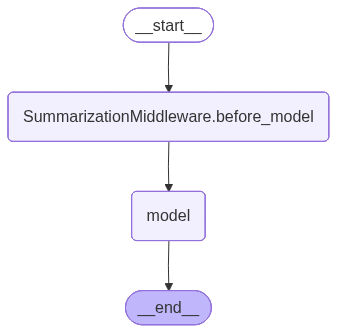

In [2]:
from langchain.agents import create_agent
from langchain.agents.middleware import SummarizationMiddleware
from langgraph.checkpoint.memory import InMemorySaver
from langchain_core.messages import HumanMessage, SystemMessage


agent=create_agent(
    model="gpt-5",
    checkpointer=InMemorySaver(),
    middleware=[SummarizationMiddleware(
        model="gpt-5",
        trigger=("messages",10),
        keep=("messages",4)
    )]
)

agent

In [3]:
config={"configurable":{"thread_id":"test1"}}


In [4]:
questions=[
    "What is the capital of France?",
    "What is the largest planet in our solar system?",
    "What is the chemical symbol for gold?",
    "What is the largest mammal on Earth?",
    "What is the chemical symbol for gold?",
    "What is the chemical symbol for silver?",
]

for q in questions:
    response=agent.invoke({"messages":[HumanMessage(content=q)]},config)
    print(f"Messages:{response}")
    print(f"Messages:{len(response['messages'])}")


Messages:{'messages': [HumanMessage(content='What is the capital of France?', additional_kwargs={}, response_metadata={}, id='1902387c-8287-4ffe-95ee-906d38e19364'), AIMessage(content='Paris.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 13, 'total_tokens': 24, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-CxHGqed9Eszmu4f3ANBBnB9rM6zrq', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019bb38a-be8e-7e71-92b4-d913972782e2-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 13, 'output_tokens': 11, 'total_tokens': 24, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio

In [7]:
from langchain.agents import create_agent
from langchain.agents.middleware import SummarizationMiddleware
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import InMemorySaver

@tool
def add(a: int, b: int) -> int:
    """Add two integers together and return the sum."""

    return a + b

agent = create_agent(
    model="gpt-5",
    tools=[add],
    middleware=[SummarizationMiddleware(model="gpt-5",trigger=("tokens",550),keep=("tokens",200))],
    checkpointer=InMemorySaver(),
)

config={"configurable":{"thread_id":"test-1"}}

def count_tokens(messages):
    total_chars=sum(len(str(m.content)) for m in messages)
    return total_chars

In [9]:
test_questions = [
    "What is 5 + 3?",
    "Can you add 10 and 25?",
    "Calculate 100 + 200",
    "What's the sum of 42 and 58?",
    "Add 7 and 13 for me",
    "What is 1000 + 2500?",
    "Please add 15 and 27",
    "What's 99 + 1?",
]

for question in test_questions:
    result = agent.invoke({"messages": [HumanMessage(content=question)]}, config=config)
    tokens=count_tokens(result["messages"])
    print({f"Question: {question}\nTokens: {tokens}"})
    print(f"{(result['messages'])}")


{'Question: What is 5 + 3?\nTokens: 15'}
[HumanMessage(content='What is 5 + 3?', additional_kwargs={}, response_metadata={}, id='ab2423fb-1226-4099-abb2-a8cf90fd6d88'), AIMessage(content='8', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 202, 'prompt_tokens': 138, 'total_tokens': 340, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 192, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-CxHoo6NgJ4oXU05gEIis5YKL6lfyf', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019bb3aa-ea3c-7c73-b7be-55310ac1a64d-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 138, 'output_tokens': 202, 'total_tokens': 340, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {